<a href="https://colab.research.google.com/github/rookasrudzianskas/PytorchModels/blob/master/22_open_source_ML_Model_CUSTOM_DATASETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

# Note we need pytorch 1.10.0


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Tue Nov 29 10:29:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Getting a data, my dataset is a subset of food 101 dataset
# Our dataset starts with 3 classes of dood, and only 10% of the images, and 1000 images per class

In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image dfolder does not exis, doewnload and prepare it
if image_path.is_dir():
  print(f"{image_path} already exists, skipping download")
else:
  print(f"{image_path} does not exists create new new one")
  image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak and sushi data...")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi dataa")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exists create new new one
Unzipping pizza, steak and sushi dataa


In [6]:
data_path / "pizza_steak_sushi.zip"

PosixPath('data/pizza_steak_sushi.zip')

In [7]:
import os
def walk_through_dir(dir_path):
  """ Walks per dir path, returning it is contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    # For each directory in directory
    print(f"There are {len(dirnames)} directorries and {len(filenames)} images in {dirpath} .")

In [8]:
walk_through_dir(image_path)

There are 2 directorries and 0 images in data/pizza_steak_sushi .
There are 3 directorries and 0 images in data/pizza_steak_sushi/train .
There are 0 directorries and 72 images in data/pizza_steak_sushi/train/sushi .
There are 0 directorries and 75 images in data/pizza_steak_sushi/train/steak .
There are 0 directorries and 78 images in data/pizza_steak_sushi/train/pizza .
There are 3 directorries and 0 images in data/pizza_steak_sushi/test .
There are 0 directorries and 31 images in data/pizza_steak_sushi/test/sushi .
There are 0 directorries and 19 images in data/pizza_steak_sushi/test/steak .
There are 0 directorries and 25 images in data/pizza_steak_sushi/test/pizza .


In [9]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

sushi
Rnadom image path data/pizza_steak_sushi/train/sushi/3579071.jpg
Image class: sushi
Image height: 512
Image width: 512


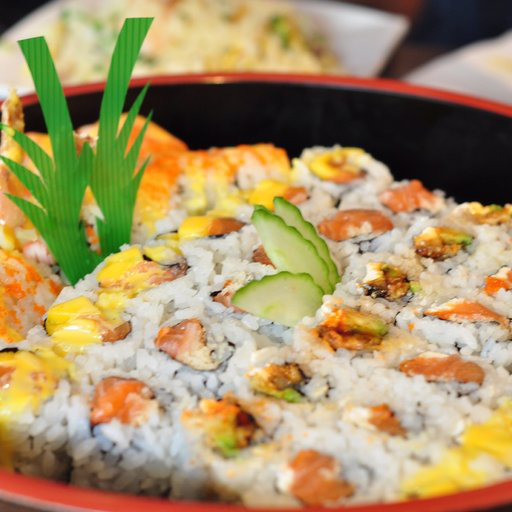

In [10]:
import random
from PIL import Image

random.seed(42)

# Get all image paths
# We want every single path image
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Selelct the random image, and show it here
random_image_path = random.choice(image_path_list)
random_image_path

# Get image class from path name (the image class in the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# Open the image with pil

img = Image.open(random_image_path)

# Print metadata
print(f"Rnadom image path {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

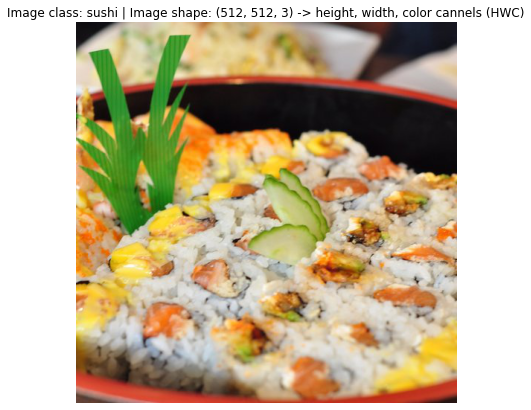

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into the array
img_as_array = np.asarray(img)

# Plot the image with matplot lib 
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> height, width, color cannels (HWC)")
plt.axis(False)

In [12]:
img_as_array

array([[[ 16,  14,  17],
        [ 16,  14,  17],
        [ 15,  13,  16],
        ...,
        [ 22,  22,  32],
        [ 22,  22,  32],
        [ 22,  22,  32]],

       [[ 16,  14,  17],
        [ 16,  14,  17],
        [ 16,  14,  17],
        ...,
        [ 22,  22,  32],
        [ 22,  22,  32],
        [ 22,  22,  32]],

       [[ 16,  14,  17],
        [ 16,  14,  17],
        [ 16,  14,  17],
        ...,
        [ 22,  22,  32],
        [ 22,  22,  32],
        [ 22,  22,  32]],

       ...,

       [[100,  70,  59],
        [100,  70,  59],
        [101,  69,  58],
        ...,
        [ 37,  22,  19],
        [ 37,  22,  19],
        [ 38,  23,  20]],

       [[ 99,  71,  59],
        [ 99,  71,  59],
        [ 98,  70,  58],
        ...,
        [ 40,  22,  20],
        [ 40,  22,  20],
        [ 40,  22,  20]],

       [[ 96,  70,  57],
        [ 96,  70,  57],
        [ 97,  71,  58],
        ...,
        [ 41,  21,  20],
        [ 41,  21,  20],
        [ 41,  21,  20]]

In [13]:
# Transforming the data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transforming data with torch vision transforms
data_transform = transforms.Compose([
    # Resize the images to 64X64
    transforms.Resize(size=(64, 64)),
    # Flip the image randomly horrizontally
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into torch tensor
    transforms.ToTensor()
])

In [14]:
data_transform(img)

tensor([[[0.0863, 0.0902, 0.0863,  ..., 0.0588, 0.0588, 0.0627],
         [0.0863, 0.0863, 0.0902,  ..., 0.0784, 0.0706, 0.0706],
         [0.0863, 0.0824, 0.0824,  ..., 0.2863, 0.1059, 0.0784],
         ...,
         [0.7725, 0.7686, 0.7647,  ..., 0.8627, 0.8510, 0.8118],
         [0.5961, 0.6627, 0.7176,  ..., 0.6706, 0.5882, 0.5255],
         [0.2235, 0.2863, 0.3882,  ..., 0.4039, 0.3765, 0.3922]],

        [[0.0863, 0.0902, 0.0863,  ..., 0.0549, 0.0510, 0.0549],
         [0.0863, 0.0863, 0.0902,  ..., 0.0784, 0.0627, 0.0627],
         [0.0863, 0.0824, 0.0824,  ..., 0.2863, 0.0980, 0.0667],
         ...,
         [0.2314, 0.2275, 0.2235,  ..., 0.3608, 0.4039, 0.4471],
         [0.2039, 0.2118, 0.2196,  ..., 0.4549, 0.4118, 0.3725],
         [0.1059, 0.1137, 0.1333,  ..., 0.2863, 0.2627, 0.2627]],

        [[0.1255, 0.1216, 0.1176,  ..., 0.0706, 0.0627, 0.0667],
         [0.1255, 0.1176, 0.1216,  ..., 0.0863, 0.0745, 0.0745],
         [0.1255, 0.1137, 0.1137,  ..., 0.2863, 0.1098, 0.

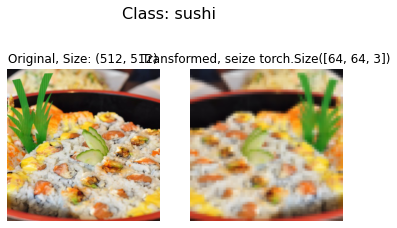

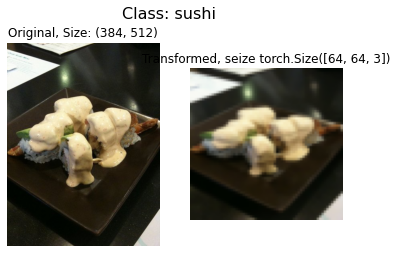

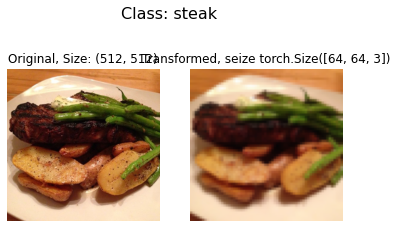

In [15]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """ Selects the random images from a path of images, and loads/transforms then plots the original versus transformed version"""
  if seed:
    random.seed(seed) 
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original, Size: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      # permute changes the C, H, W to H, W, C
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change the shape for matplotlib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed, seize {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)

In [16]:
image_path_list

[PosixPath('data/pizza_steak_sushi/train/sushi/2873571.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/700405.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/268990.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3251688.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2017378.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/542188.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/424994.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1552504.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2004525.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2021685.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3360207.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/765684.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/93139.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/794647.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2871052.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1221830.jpg'),
 PosixPath('data

In [17]:
# Loading image data using image folder
# Use image folder to create datasets
from torchvision import datasets